In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

# 1 - Conversion PPM en PGM

A. Read image
b. Convert YUV -> RGB
c. Write image as jpg

(540, 720, 3)


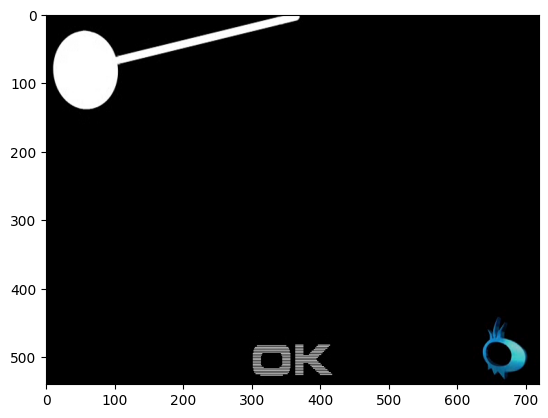

In [2]:
real_shape = (540, 720)
target = cv2.imread("results/target.png")
print(target.shape)
plt.imshow(target)

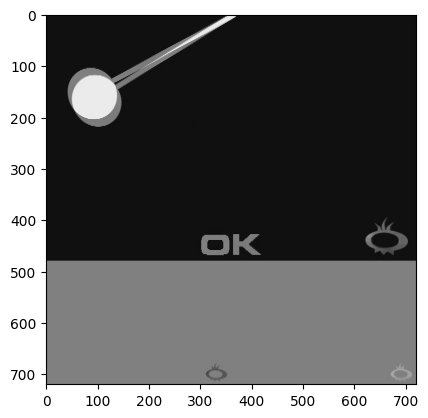

In [3]:
# Read image
ppm_starter = cv2.imread("results/pgm/56.pgm")
plt.imshow(ppm_starter)

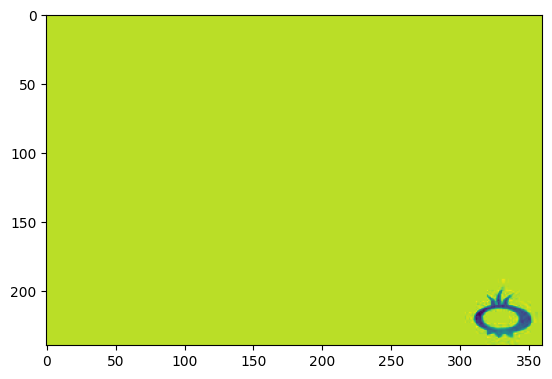

In [4]:
#ppm_starter.shape  (4:2:2)
# y -> 480, 720
# u, v -> 240, 360 
y_ppm = ppm_starter[480:, :360, 0]
plt.imshow(y_ppm)
# We can see that all the information is on only one channel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


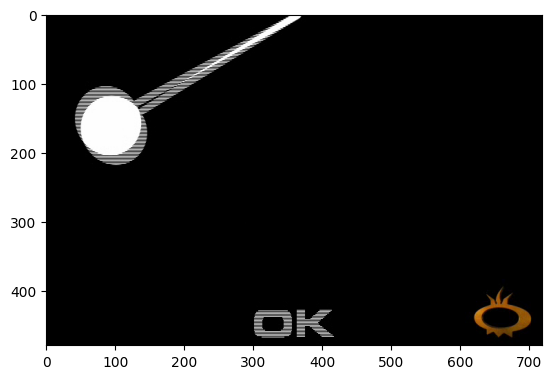

In [10]:
def yuv_to_rgb(yuv_image) : 
    def convert_pixel(y, u, v) :
        y -= 16
        u -= 128
        v -= 128 
        r:int = 1.164 * y + 1.596 * v
        g:int = 1.164 * y - 0.392 * u - 0.813 * v
        b:int = 1.164 * y + 2.017 * u 
        return [r, g, b]

    new_image = np.zeros((480, 720, 3), int)
    for i in range(0, 480) :
        for j in range(0, 720) : 
            y = yuv_image[i, j, 0]
            u = yuv_image[480 + math.floor(i / 2) , math.floor(j / 2), 0]
            v = yuv_image[480 + math.floor(i / 2) , 360 + math.floor(j / 2), 0]
            #print(y, u, v)
            rgb = convert_pixel(y, u, v)
            #print("Rgb :", rgb)
            new_image[i, j] = rgb
    return new_image

new_image = yuv_to_rgb(ppm_starter)
plt.imshow(new_image)

In [9]:
print(new_image[125, 125])
print(new_image.dtype)
print(ppm_starter[125, 125, 0], ppm_starter[480 + 125 // 2, 125, 0], ppm_starter[480 + 125 // 2, 360 + 125, 0])


[256 256 256]
int64
236 128 128
